<a href="https://colab.research.google.com/github/reynaldikhsan27/portfolioreynaldi/blob/main/python_panda%20numpy%20snsplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Mentoring 2: Python

In [1]:
#import pandas
# use: tabular data manipulation
import pandas as pd
pd.set_option("display.max_columns",None)

#import numpy
#manipulate matrix and vector
import numpy as np


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import re
sns.set()

## Hotel Booking Demand Dataset


### Source
Antonio, N., de Almeida, A. and Nunes, L. (2019) “Hotel booking demand datasets,” Data in Brief, 22, pp. 41–49. Available at: https://doi.org/10.1016/j.dib.2018.11.126. 

Downloaded and cleaned data: [tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11)


### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [2]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Add id as the unique identifiers

In [3]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Check** column

In [4]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Check data type

In [5]:
df_hotels.dtypes

id                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

Check NULL value

In [6]:
df_hotels.isna().sum(axis=0)

id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

Check unique value

In [7]:
df_hotels.nunique(axis=0)

id                                119390
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent           

In [8]:
round(100*(df_hotels.isnull().sum()/len(df_hotels.index)),2)

id                                 0.00
hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69


## Number 1

Create a function for:

*   check data type,
*   checknull value,
*   check percent null value, 
*   unique value in each column

In [9]:
def check_values(df):
  #count missing value
  missing = df.isnull().sum()

  #percentage of missing
  percent = 100*(missing/len(df)) #or you can also use df.shape[0]

  #data type
  data_type = df.dtypes

  #unique values
  n_unique = df.nunique()

  return pd.DataFrame({'number_of_missing':missing,
                       'percentage':percent,
                       'data_type':data_type,
                       'unique_values':n_unique}).sort_values('percentage',ascending=False)

In [10]:
check_values(df_hotels)

,number_of_missing,percentage,data_type,unique_values
company,112593,94.306893,float64,352
agent,16340,13.686238,float64,333
country,488,0.408744,object,177
children,4,0.003350,float64,5
reserved_room_type,0,0.000000,object,10
assigned_room_type,0,0.000000,object,12
booking_changes,0,0.000000,int64,21
deposit_type,0,0.000000,object,3
id,0,0.000000,int64,119390
previous_cancellations,0,0.000000,int64,15


## Number 2
Proportion of cancellation

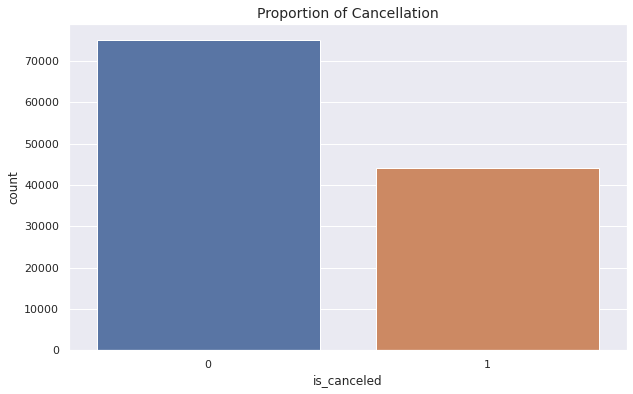

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_hotels,x="is_canceled")
plt.title("Proportion of Cancellation",fontsize=14)
plt.show()

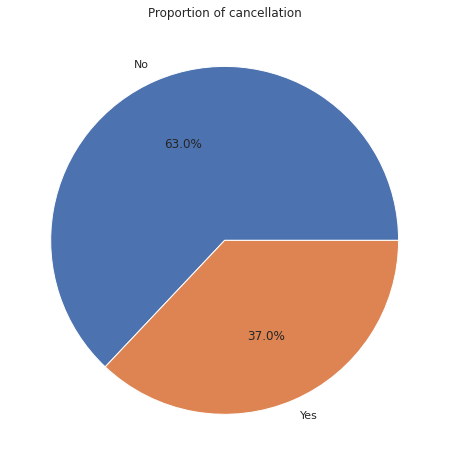

In [15]:
#pie chart

plt.figure(figsize=(8,8))
plt.pie(df_hotels["is_canceled"].value_counts(),
       autopct='%1.1f%%',labels=["No","Yes"])
plt.title("Proportion of cancellation")
plt.show()

other option for visualization

*   sns.barplot(data = ...., x ="....", y = ".......")
*   sns.lineplot(data=...., x=".....", y = ".......")
*   sns.histogram(data =  ......, x = "...", y = "....")



## Number 3

cancellation (in %) by type of hotel


In [17]:
df_hotels.groupby("hotel")["is_canceled"].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

Answering the same question with plots

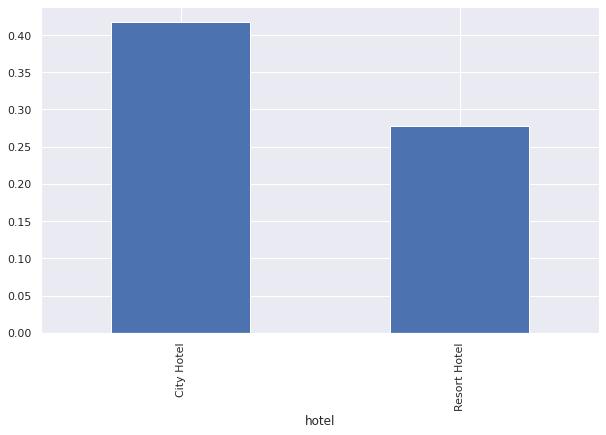

In [18]:
plt.figure(figsize=(10,6))
df_hotels.groupby("hotel")["is_canceled"].mean().plot(kind='bar')
plt.show()

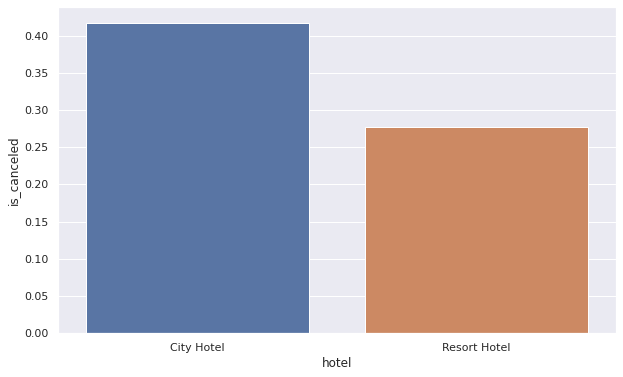

In [19]:
ratio_cancel_hotel = df_hotels.groupby("hotel")["is_canceled"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=ratio_cancel_hotel,x="hotel",y="is_canceled")
plt.show()

## Number 4

Filter the data to show only those who did not cancel the reservation

In [20]:
df_checkout = df_hotels[df_hotels.is_canceled==0]
df_checkout.shape

df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Number 5

Number of reservation each month

**> (!) We are using the `df_checkout` dataframe from now on**

In [21]:
#Write the code here

#group by month
df_checkout.groupby(['hotel', 'arrival_date_month']).size()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

In [22]:
import calendar

for i in calendar.month_name:
  print(i)


January
February
March
April
May
June
July
August
September
October
November
December


In [23]:
import calendar

month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [24]:
# map each month to appropriate number

df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)

<ipython-input-24-e3218aba3a0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)


In [25]:
df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [ ]:
df_checkout.dtypes

id                                  int64
id                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   

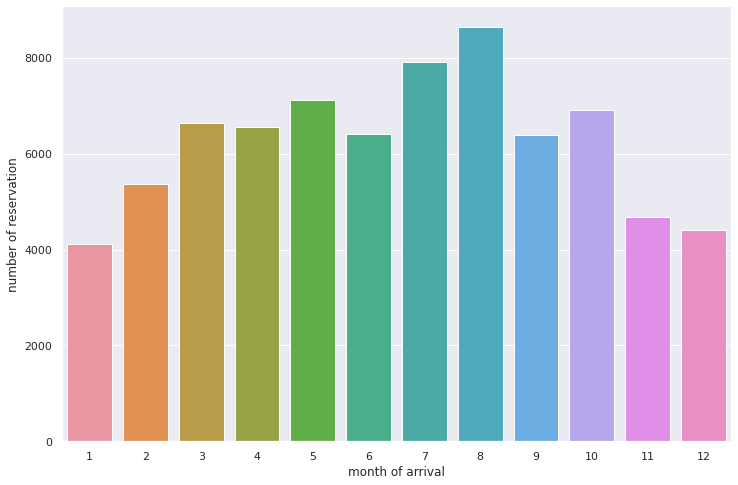

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_checkout, x='arrival_date_month_num')
plt.xlabel('month of arrival')
plt.ylabel('number of reservation')
plt.show()

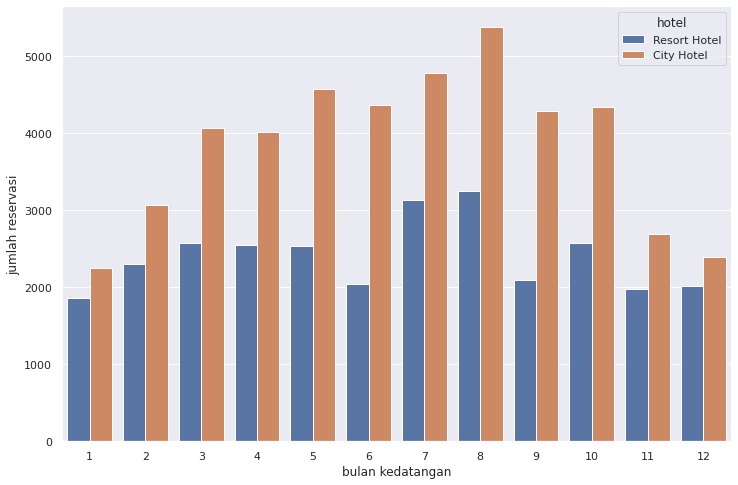

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_checkout, x='arrival_date_month_num',hue='hotel')
plt.xlabel('bulan kedatangan')
plt.ylabel('jumlah reservasi')
plt.show()

## Nomor 6

create a new column of `arrival_date`, change the type to datetime in `yyyy-mm-dd` format

In [ ]:
# convert arrival_date_month_num into string
# write the code down below

In [29]:
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month_num'].astype(object)

<ipython-input-29-118006436f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month_num'].astype(object)


In [30]:
list_arrival = []

for year,month,day in zip(df_checkout["arrival_date_year"],df_checkout["arrival_date_month"],
                          df_checkout["arrival_date_day_of_month"]):
    if len(str(month)) < 2:
        temp = str(year) + "-" + "0" + str(month) + "-" + str(day)
        list_arrival.append(temp)
    else:
        temp = str(year) + "-" + str(month) + "-" + str(day)
        list_arrival.append(temp)

print(list_arrival)

['2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-1', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-2', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-July-3', '2015-Jul

In [31]:
df_checkout['arrival_date'] = list_arrival

<ipython-input-31-ad06bea0ea46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = list_arrival


In [32]:
df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-July-1
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-July-1
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-July-1
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-July-1
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-July-1


In [ ]:
df_checkout.dtypes

id                                  int64
id                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   

In [33]:
df_checkout.arrival_date.dtype

dtype('O')

In [35]:
# convert to datetime 
df_checkout['arrival_date'] = pd.to_datetime(df_checkout["arrival_date"])
df_checkout['arrival_date']

<ipython-input-35-1fe4c3f4c96a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout["arrival_date"])


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

In [36]:
df_checkout.arrival_date.dtype

dtype('<M8[ns]')

## Number 7

Number of reservation daily (time series demonstration)

In [39]:
df_reservation_perday = df_checkout.groupby(['arrival_date'])['arrival_date'].count().reset_index(name="total_reservation")
df_reservation_perday.head(20)

,arrival_date,total_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
5,2015-07-06,41
6,2015-07-07,29
7,2015-07-08,45
8,2015-07-09,29
9,2015-07-10,42


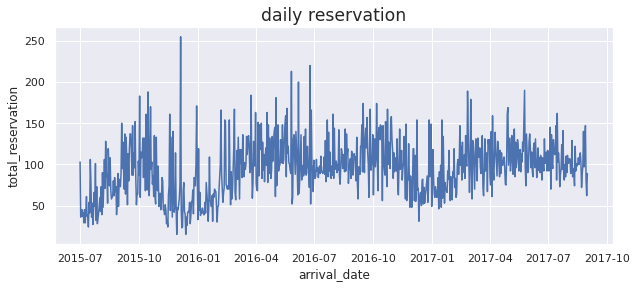

In [40]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_reservation_perday, x='arrival_date', y='total_reservation')
plt.title('daily reservation', fontsize='x-large')
plt.show()

In [43]:
df_avg_daily_reservation = df_reservation_perday.resample('W',on='arrival_date').mean().reset_index().rename(columns={0:'total_reservation'})
df_avg_daily_reservation.head(10)

,arrival_date,total_reservation
0,2015-07-05,51.600000
1,2015-07-12,40.571429
2,2015-07-19,53.857143
3,2015-07-26,53.000000
4,2015-08-02,47.142857
5,2015-08-09,72.000000
6,2015-08-16,92.428571
7,2015-08-23,71.142857
8,2015-08-30,65.714286
9,2015-09-06,99.285714


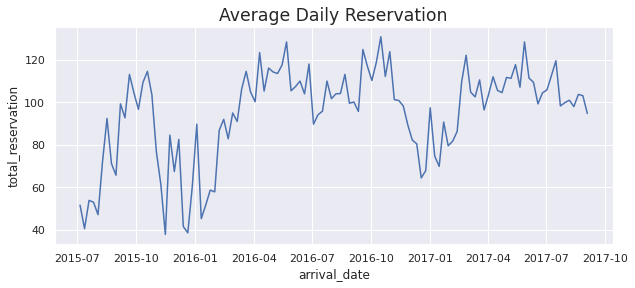

In [44]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily_reservation, x='arrival_date', y='total_reservation')
plt.title('Average Daily Reservation', fontsize='x-large')
plt.show()

## Number 8 8 

ADR by each type of hotel and type of customer

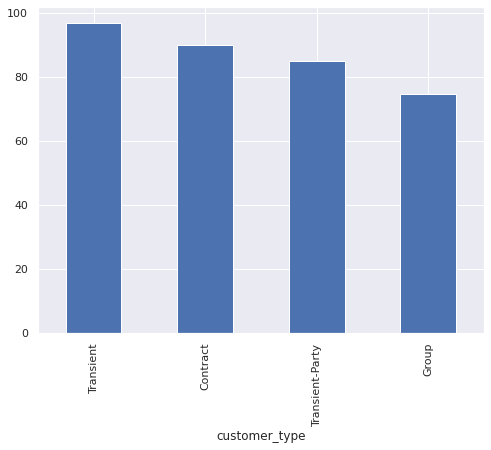

In [45]:
#Write the code here
plt.figure(figsize=(8,6))
df_checkout.groupby(["customer_type"])["adr"].median().sort_values(ascending=False).plot(kind='bar')
plt.show()

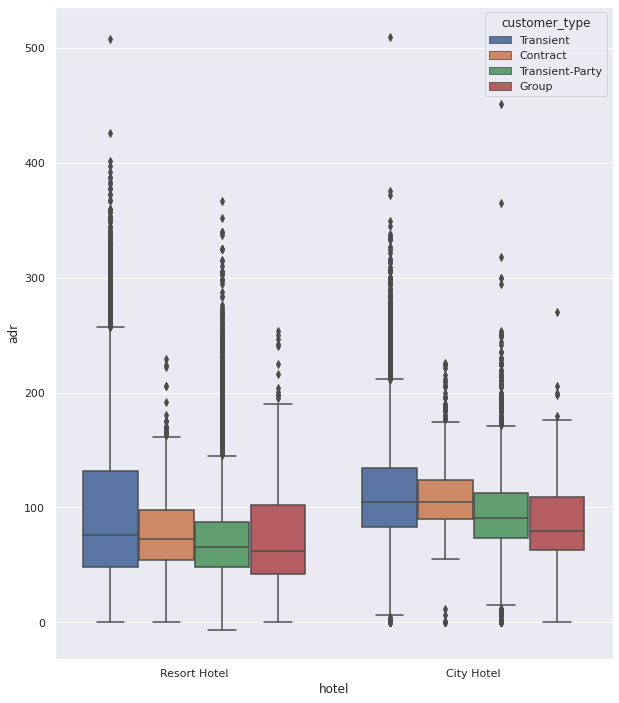

In [46]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df_checkout,x="hotel",y="adr",hue = 'customer_type')
plt.show()

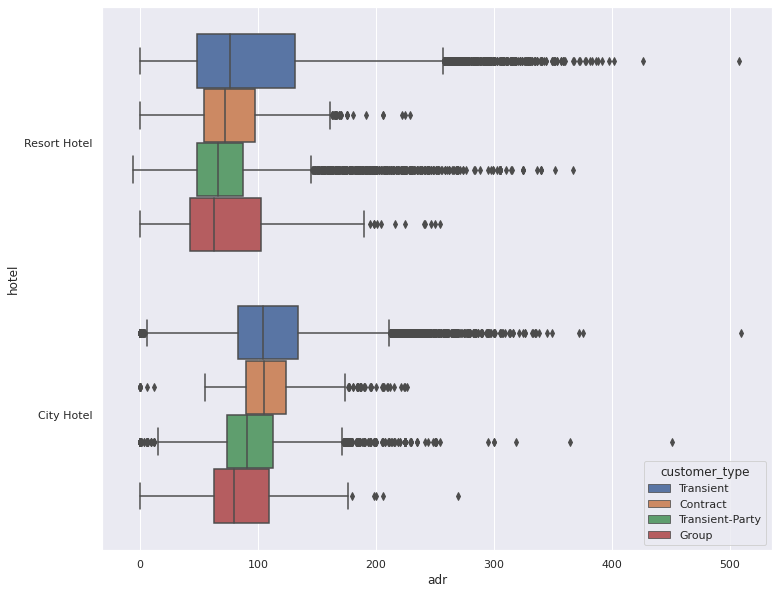

In [47]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

additional analysis

In [48]:
filter_resort_hotel_transient = (df_checkout["hotel"]=="Resort Hotel")&(df_checkout["customer_type"]=="Transient")

In [49]:
resort_hotel_transient = df_checkout[filter_resort_hotel_transient]
resort_hotel_transient

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,7,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,7,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,7,2015-07-01
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,7,2015-07-01
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,7,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40051,40051,Resort Hotel,0,264,2017,August,34,26,4,10,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,71.0,NaN,0,Transient,89.79,0,0,Check-Out,2017-09-09,8,2017-08-26
40052,40052,Resort Hotel,0,207,2017,August,34,26,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,143.0,NaN,0,Transient,131.70,0,2,Check-Out,2017-09-09,8,2017-08-26
40055,40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.0,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,8,2017-08-31
40057,40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,8,2017-08-29


In [50]:
filter_resort_hotel_contract = (df_checkout["hotel"]=="Resort Hotel")&(df_checkout["customer_type"]=="Contract")

In [51]:
resort_hotel_contract = df_checkout[filter_resort_hotel_contract]
resort_hotel_contract

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date
16,16,Resort Hotel,0,37,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,8.0,NaN,0,Contract,97.50,0,0,Check-Out,2015-07-05,7,2015-07-01
24,24,Resort Hotel,0,127,2015,July,27,1,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,I,0,No Deposit,115.0,NaN,0,Contract,94.95,0,1,Check-Out,2015-07-01,7,2015-07-01
26,26,Resort Hotel,0,48,2015,July,27,1,2,5,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,8.0,NaN,0,Contract,79.50,0,0,Check-Out,2015-07-08,7,2015-07-01
41,41,Resort Hotel,0,45,2015,July,27,2,2,3,2,0.0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,8.0,NaN,0,Contract,79.50,0,0,Check-Out,2015-07-07,7,2015-07-02
48,48,Resort Hotel,0,90,2015,July,27,2,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,A,B,1,No Deposit,243.0,NaN,0,Contract,82.35,0,0,Check-Out,2015-07-09,7,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40044,40044,Resort Hotel,0,270,2017,August,34,25,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,112.80,0,0,Check-Out,2017-09-08,8,2017-08-25
40047,40047,Resort Hotel,0,214,2017,August,35,29,2,8,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,85.80,0,0,Check-Out,2017-09-08,8,2017-08-29
40049,40049,Resort Hotel,0,217,2017,August,35,31,2,7,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,E,0,No Deposit,40.0,NaN,0,Contract,110.80,0,0,Check-Out,2017-09-09,8,2017-08-31
40053,40053,Resort Hotel,0,269,2017,August,34,24,4,13,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.0,NaN,0,Contract,84.80,0,2,Check-Out,2017-09-10,8,2017-08-24


In [52]:
from scipy.stats import f_oneway

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


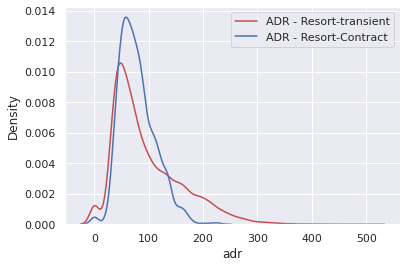

In [55]:
sns.distplot(resort_hotel_transient["adr"],color="r",hist=False,label="ADR - Resort-transient")
sns.distplot(resort_hotel_contract["adr"],color="b",hist=False,label="ADR - Resort-Contract")
plt.legend()

In [56]:
F, p = f_oneway(resort_hotel_transient["adr"],resort_hotel_contract["adr"])

if p < 0.05:
    print("Significant differences")
else:
    print("No significant differences")

Significant differences


## Number 9

Use `df_country` dataframe that contains information of country and their country code. Then show top 10 countries with the most number of bookings.

In [57]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [58]:
df_country['Alpha-3 code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()
df_country['Alpha-2 code'] = df_country['Alpha-2 code'].str.replace('"','').str.strip()
df_country['Numeric code'] = df_country['Numeric code'].str.replace('"','').str.strip()
df_country['Latitude (average)'] = df_country['Latitude (average)'].str.replace('"','').str.strip()
df_country['Longitude (average)'] = df_country['Longitude (average)'].str.replace('"','').str.strip()

In [ ]:
df_country.head(10)

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33,65
1,Albania,AL,ALB,8,41,20
2,Algeria,DZ,DZA,12,28,3
3,American Samoa,AS,ASM,16,-14.3333,-170
4,Andorra,AD,AND,20,42.5,1.6
5,Angola,AO,AGO,24,-12.5,18.5
6,Anguilla,AI,AIA,660,18.25,-63.1667
7,Antarctica,AQ,ATA,10,-90,0
8,Antigua and Barbuda,AG,ATG,28,17.05,-61.8
9,Argentina,AR,ARG,32,-34,-64


In [60]:
df_merged = pd.merge(df_country, df_checkout, left_on='Alpha-3 code', right_on='country', how='left')
df_merged.shape

(74353, 41)

In [61]:
df_merged.groupby(['Country']).size().nlargest(10)

Country
Portugal          21071
United Kingdom     9676
France             8481
Spain              6391
Germany            6069
Ireland            2543
Italy              2433
Belgium            1868
Netherlands        1717
United States      1596
dtype: int64

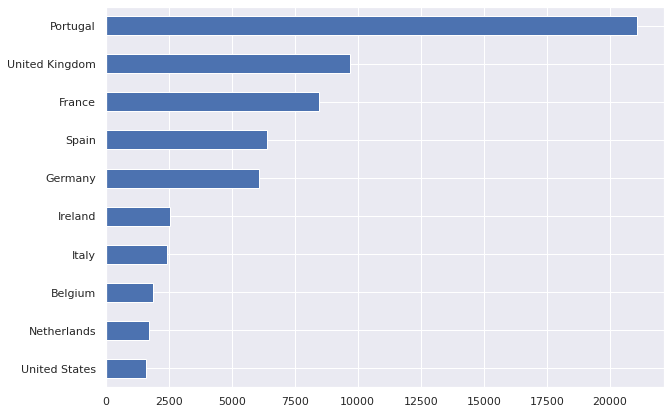

In [62]:
plt.figure(figsize=(10,7))
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.show()

## Number 10
A. How many guest for each reservation?

B. What is the highest number of guests in a reservation?

In [63]:
df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01


In [64]:
df_checkout.dtypes

id                                         int64
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type  

In [65]:
df_checkout['children'] = df_checkout['children'].astype(int)

<ipython-input-65-82da15eb924b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['children'] = df_checkout['children'].astype(int)


In [66]:
df_checkout['total_guest'] = df_checkout['adults'] + df_checkout['children'] + df_checkout['babies']
df_checkout.head()

<ipython-input-66-a0338fad4c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout['adults'] + df_checkout['children'] + df_checkout['babies']


,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date,total_guest
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01,2
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01,1
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01,2


Text(0.5, 1.0, 'Total Guest')

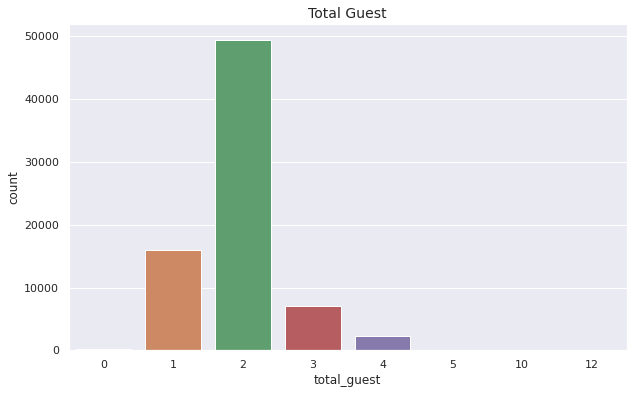

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_checkout,x="total_guest")
plt.title("Total Guest",fontsize=14)

In [68]:
#descriptive analysis of column total_guest
df_checkout['total_guest'].describe()

count    75166.000000
mean         1.942461
std          0.669966
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: total_guest, dtype: float64

The most guests in one reservation were 12 persons. Was that a reunion?

In [69]:
#further analysis

df_checkout.groupby("total_guest")["total_guest"].count()

total_guest
0       155
1     16026
2     49479
3      7118
4      2283
5       103
10        1
12        1
Name: total_guest, dtype: int64

Most reservation were made for 2 persons (couple!?)

In [70]:
(df_checkout.groupby("total_guest").size()/df_checkout["total_guest"].count())*100

total_guest
0      0.206210
1     21.320810
2     65.826304
3      9.469707
4      3.037277
5      0.137030
10     0.001330
12     0.001330
dtype: float64

65% of reservations were for two persons

In [71]:
mostguests = pd.DataFrame(df_checkout, columns=['id','hotel','total_guest','adult','children','babies','arrival_date_month','country','stays_in_weekend_nights','stays_in_week_nights'])
mostguests.sort_values(by=['total_guest'], inplace=True, ascending=False)
mostguests.head(10)


,id,hotel,total_guest,adult,children,babies,arrival_date_month,country,stays_in_weekend_nights,stays_in_week_nights
46619,46619,City Hotel,12,NaN,0,10,January,PRT,0,2
78656,78656,City Hotel,10,NaN,0,9,October,GBR,2,1
106216,106216,City Hotel,5,NaN,3,0,February,FRA,2,2
109450,109450,City Hotel,5,NaN,3,0,April,GBR,1,1
119054,119054,City Hotel,5,NaN,3,0,August,GBR,2,1
16502,16502,Resort Hotel,5,NaN,2,1,August,PRT,2,3
26613,26613,Resort Hotel,5,NaN,3,0,July,PRT,2,5
118265,118265,City Hotel,5,NaN,2,1,August,ESP,1,2
96004,96004,City Hotel,5,NaN,2,1,August,FRA,0,1
117533,117533,City Hotel,5,NaN,3,0,August,GBR,0,3
